## 0. Adatfeltárás

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random

In [8]:
random.seed(42)

In [3]:
df_masks = pd.read_csv('train_ship_segmentations_v2.csv')
df_masks.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [4]:
def rle_decode(mask_rle, shape=(768, 768)):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

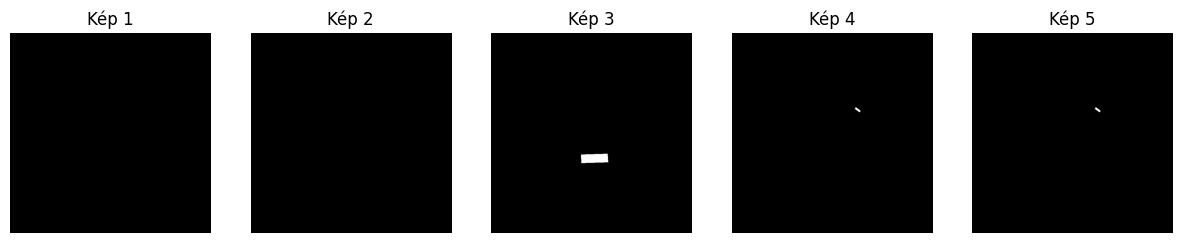

In [6]:
num_images = 5
plt.figure(figsize=(15, 15))

for i in range(num_images):
    # Az i-edik képhez tartozó Run-Length Encoding (RLE) maszk kiválasztása
    image_id = df_masks['ImageId'].iloc[i]
    image_rle = df_masks[df_masks['ImageId'] == image_id]['EncodedPixels'].values[0]

    # Az RLE dekódolása, ha nem üres (NaN)
    if pd.isna(image_rle):
        mask = np.zeros((768, 768), dtype=np.uint8)
    else:
        mask = rle_decode(image_rle, shape=(768, 768))

    # Maszk megjelenítése: hajók fehérek, háttér fekete
    plt.subplot(1, num_images, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Kép {i + 1}")
    plt.axis('off')
    
plt.show()